In [1]:

# Import modules
from datasets import load_dataset
from transformers import AutoFeatureExtractor, Wav2Vec2ForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load Arabic audio deepfake dataset
dataset = load_dataset("DeepFake-Audio-Rangers/Arabic_Audio_Deepfake")

# Load XLS-R pretrained model and feature extractor
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-xls-r-300m")
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-xls-r-300m", num_labels=2)

# Preprocess audio samples
def preprocess(batch):
    audio = batch["audio"]["array"]
    inputs = feature_extractor(audio, sampling_rate=16000, return_tensors="pt", padding=True)
    batch["input_values"] = inputs.input_values[0].numpy()
    batch["labels"] = batch["label"]
    return batch

dataset = dataset.map(preprocess, remove_columns=["audio"])
dataset = dataset.with_format("torch")

# Define metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
)

# Train and evaluate
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()


README.md:   0%|          | 0.00/2.30k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15648 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3913 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-xls-r-300m and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15648 [00:00<?, ? examples/s]

Map:   0%|          | 0/3913 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.094200,0.061148,0.986455,0.951862,0.920914,0.984962
2,0.063300,0.018661,0.996422,0.986792,0.990530,0.983083
3,0.001600,0.017053,0.996933,0.988679,0.992424,0.984962


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=2934, training_loss=0.1101680017167216, metrics={'train_runtime': 4063.8492, 'train_samples_per_second': 11.552, 'train_steps_per_second': 0.722, 'total_flos': 4.268245681870848e+18, 'train_loss': 0.1101680017167216, 'epoch': 3.0})

In [1]:

# Import modules
from datasets import load_dataset
from transformers import AutoFeatureExtractor, Wav2Vec2ForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load Arabic audio deepfake dataset
dataset = load_dataset("DeepFake-Audio-Rangers/Arabic_Audio_Deepfake")

# Load XLS-R pretrained model and feature extractor
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-xls-r-300m")
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-xls-r-300m", num_labels=2)

# Preprocess audio samples
def preprocess(batch):
    audio = batch["audio"]["array"]
    inputs = feature_extractor(audio, sampling_rate=16000, return_tensors="pt", padding=True)
    batch["input_values"] = inputs.input_values[0].numpy()
    batch["labels"] = batch["label"]
    return batch

dataset = dataset.map(preprocess, remove_columns=["audio"])
dataset = dataset.with_format("torch")

# Define metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=18,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
)

# Train and evaluate
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()


README.md:   0%|          | 0.00/2.30k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15648 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3913 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-xls-r-300m and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15648 [00:00<?, ? examples/s]

Map:   0%|          | 0/3913 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.104900,0.022500,0.993355,0.975518,0.977358,0.973684
2,0.045900,0.051995,0.990289,0.962963,1.000000,0.928571
3,0.001100,0.073313,0.986200,0.946535,1.000000,0.898496
4,0.016200,0.018390,0.997444,0.990530,0.998092,0.983083
5,0.101000,0.017805,0.997189,0.989554,1.000000,0.979323
6,0.000100,0.041103,0.994889,0.980843,1.000000,0.962406
7,0.001200,0.026830,0.996167,0.985755,0.996161,0.975564
8,0.000700,0.015913,0.998467,0.994329,1.000000,0.988722
9,0.000100,0.019766,0.997700,0.991469,1.000000,0.983083
10,0.018400,0.022991,0.997444,0.990530,0.998092,0.983083


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=17604, training_loss=0.024446017953701125, metrics={'train_runtime': 25034.5346, 'train_samples_per_second': 11.251, 'train_steps_per_second': 0.703, 'total_flos': 2.560947409122509e+19, 'train_loss': 0.024446017953701125, 'epoch': 18.0})

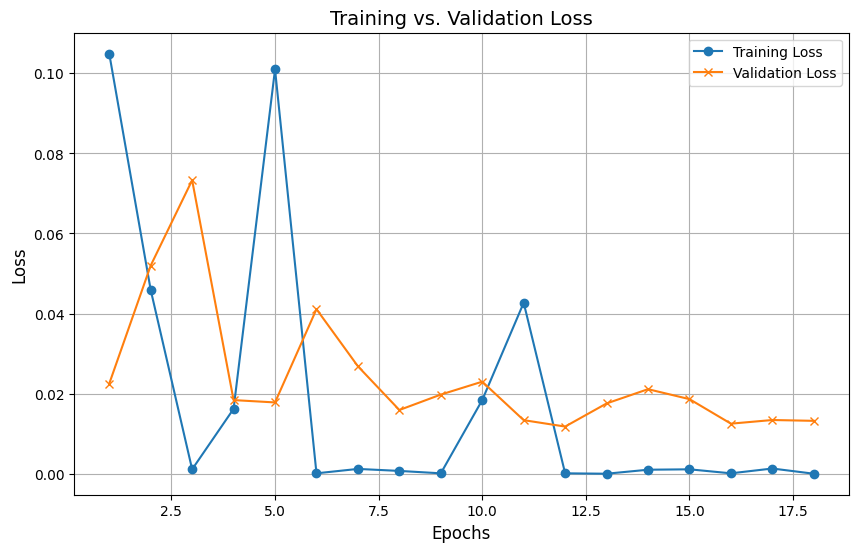

wandb: 🚀 View run ./results at: https://wandb.ai/malak-t5050-german-international-university-giu/huggingface/runs/b20xmyqs
wandb: Find logs at: wandb/run-20241130_100437-b20xmyqs/logs


In [24]:
import matplotlib.pyplot as plt

# Data for training and validation loss
epochs = list(range(1, 19))  # Epochs 1 through 18
train_loss = [
    0.104900, 0.045900, 0.001100, 0.016200, 0.101000, 0.000100, 0.001200, 
    0.000700, 0.000100, 0.018400, 0.042700, 0.000100, 0.000000, 0.001000, 
    0.001100, 0.000100, 0.001300, 0.000000
]
val_loss = [
    0.022500, 0.051995, 0.073313, 0.018390, 0.017805, 0.041103, 0.026830, 
    0.015913, 0.019766, 0.022991, 0.013378, 0.011778, 0.017553, 0.021113, 
    0.018631, 0.012502, 0.013415, 0.013208
]

# Create a line plot for losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')

# Add labels, title, and legend
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs. Validation Loss', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [2]:


# Save the model and feature extractor after training
trainer.save_model("./trained_model")
feature_extractor.save_pretrained("./trained_model")

# Optionally save the tokenizer, if used separately
# tokenizer.save_pretrained("./trained_model")


['./trained_model/preprocessor_config.json']

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


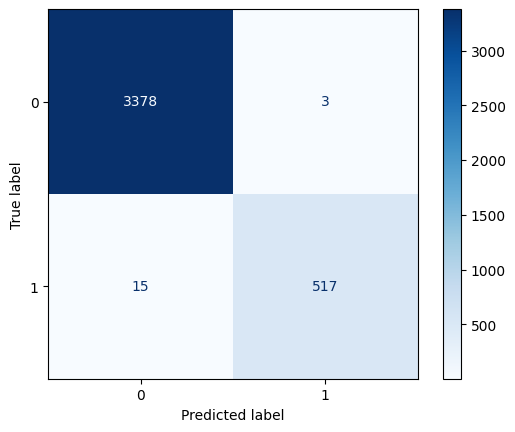

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get model predictions on test set
predictions = trainer.predict(dataset["test"])

# Compute confusion matrix
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=-1)
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap="Blues")


In [7]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Calculate TP, TN, FP, FN
    tp = np.sum((predictions == 1) & (labels == 1))
    tn = np.sum((predictions == 0) & (labels == 0))
    fp = np.sum((predictions == 1) & (labels == 0))
    fn = np.sum((predictions == 0) & (labels == 1))

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
    }


In [9]:
from transformers import TrainerCallback

class TrainingStatsCallback(TrainerCallback):
    def on_train_begin(self, args, state, control, **kwargs):
        self.start_time = time.time()

    def on_epoch_end(self, args, state, control, **kwargs):
        epoch_time = time.time() - self.start_time
        print(f"Epoch {state.epoch} finished in {epoch_time:.2f}s")
        
    def on_train_end(self, args, state, control, **kwargs):
        total_training_time = time.time() - self.start_time
        print(f"Total training time: {total_training_time:.2f}s")

trainer.add_callback(TrainingStatsCallback)


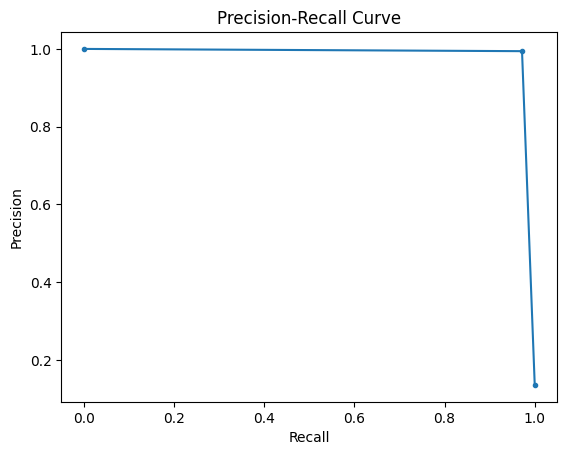

In [12]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [3]:
from transformers import AutoFeatureExtractor, Wav2Vec2ForSequenceClassification

# Load the model and feature extractor
model = Wav2Vec2ForSequenceClassification.from_pretrained("./trained_model")
feature_extractor = AutoFeatureExtractor.from_pretrained("./trained_model")

# Now you can use the model and feature extractor for inference


OSError: Incorrect path_or_model_id: './trained_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [2]:
# Save model and feature extractor to the /kaggle/working directory
model.save_pretrained("/kaggle/working/my_trained_model")
feature_extractor.save_pretrained("/kaggle/working/my_trained_model")


NameError: name 'model' is not defined

In [5]:
!zip -r my_trained_model.zip /kaggle/working/my_trained_model


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/my_trained_model/ (stored 0%)
  adding: kaggle/working/my_trained_model/model.safetensors (deflated 7%)
  adding: kaggle/working/my_trained_model/config.json (deflated 64%)
  adding: kaggle/working/my_trained_model/preprocessor_config.json (deflated 35%)


In [8]:
!pip install librosa

In [11]:
pip install gTTS


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [13]:
from gtts import gTTS

# Define the text you want to convert to speech
text = """
مرحباً، كيف حالك؟ أنا هنا لأساعدك في كل ما تحتاجه. 
إذا كان لديك أي سؤال، فلا تتردد في سؤالي.
سأكون سعيدًا بمساعدتك في أي موضوع.
"""

# Create the speech using gTTS
tts = gTTS(text=text, lang='ar')

# Save the speech file in the correct directory
output_path = '/kaggle/working/arabic_speech.mp3'
tts.save(output_path)

print(f"Arabic speech saved at {output_path}")


Arabic speech saved at /kaggle/working/arabic_speech.mp3


In [16]:
# Import necessary libraries
import librosa
import torch
import numpy as np

# Path to the audio files
real_audio_path = "/kaggle/input/real-test/common_voice_ar_38060914.mp3"
deepfake_audio_path = "/kaggle/input/fake-test/ttsMP3.com_VoiceText_2024-11-30_19-40-20.mp3"

# Load and preprocess the real audio file
audio_input_real, _ = librosa.load(real_audio_path, sr=16000)

# Load and preprocess the deepfake audio file
audio_input_fake, _ = librosa.load(deepfake_audio_path, sr=16000)

# Pass these to your feature extractor and model
inputs_real = feature_extractor(audio_input_real, sampling_rate=16000, return_tensors="pt", padding=True)
inputs_fake = feature_extractor(audio_input_fake, sampling_rate=16000, return_tensors="pt", padding=True)

# Use the model
model.eval()
with torch.no_grad():
    logits_real = model(inputs_real.input_values).logits
    logits_fake = model(inputs_fake.input_values).logits

    # Predictions
    prediction_real = np.argmax(logits_real.numpy(), axis=-1)
    prediction_fake = np.argmax(logits_fake.numpy(), axis=-1)

# Display results
print(f"Prediction for real audio: {prediction_real}")
print(f"Prediction for deepfake audio: {prediction_fake}")


Prediction for real audio: [1]
Prediction for deepfake audio: [0]


In [17]:
!pip install gdown

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [21]:
!pip install pydrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 20.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=880167284e1db1406fdcfd8c232a2d06ea1a1523ccad13215142a868b9356bb1
  Stored in directory: /root/.cache/pip/wheels/63/79/df/924c22c080c9dac1a57f611baa837fe0bc3daec1500b27f23b
Successfully built pydrive


In [23]:
import requests

# Upload the large file to file.io
with open('/kaggle/working/my_trained_model/model.safetensors', 'rb') as f:
    response = requests.post('https://file.io', files={'file': f})
print(f"Download link: {response.json()['link']}")


Download link: https://file.io/JoSisCKAkMtw


In [1]:
import transformers
print(transformers.__version__)


4.45.1


In [3]:
import transformers
import librosa
print(transformers.__version__)
print(librosa.__version__)

4.45.1
0.10.2.post1
